In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Load the dataset and perform EDA


In [4]:
data = pd.read_csv('Delivery_time.csv')

In [5]:
data

,Unnamed: 0,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,4,29.00,10
5,5,15.35,6
6,6,19.00,7
7,7,9.50,3
8,8,17.90,10
9,9,18.75,9


In [6]:
df= {"Delivery Time" : (data["Delivery Time"]),
       "Sorting Time ": (data["Sorting Time"])}

In [7]:
df2 = pd.DataFrame(df)

In [8]:
df2

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
df2.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [11]:
df2.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [12]:
df2.columns

Index(['Delivery Time', 'Sorting Time '], dtype='object')

# Visualize the data

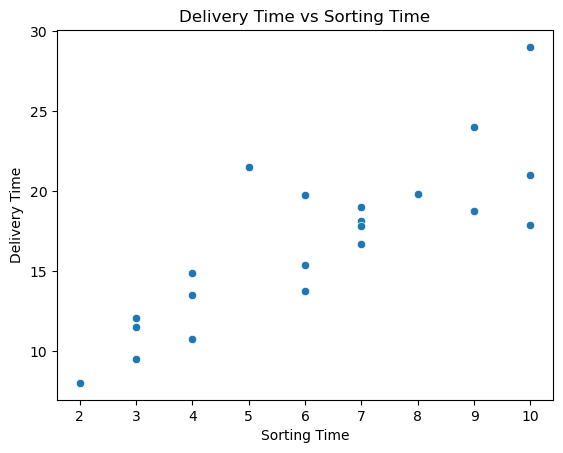

In [13]:
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=data)
plt.title('Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Histograms

Text(0, 0.5, 'Frequency')

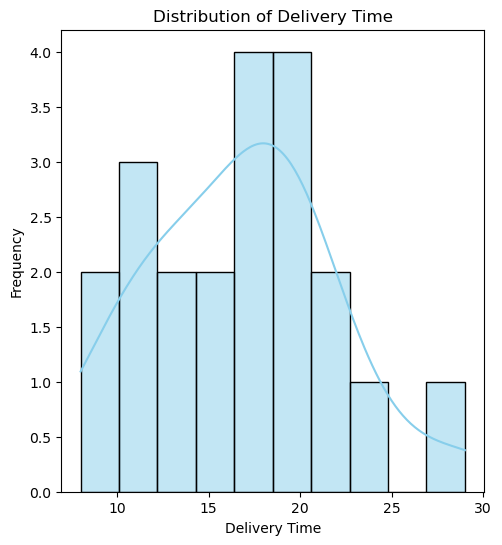

In [14]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df2['Delivery Time'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')


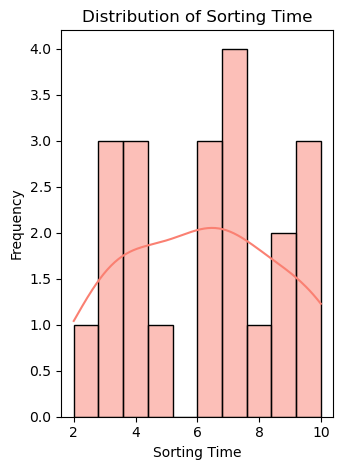

In [15]:
plt.subplot(1, 2, 2)
sns.histplot(data['Sorting Time'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the data with a regression line

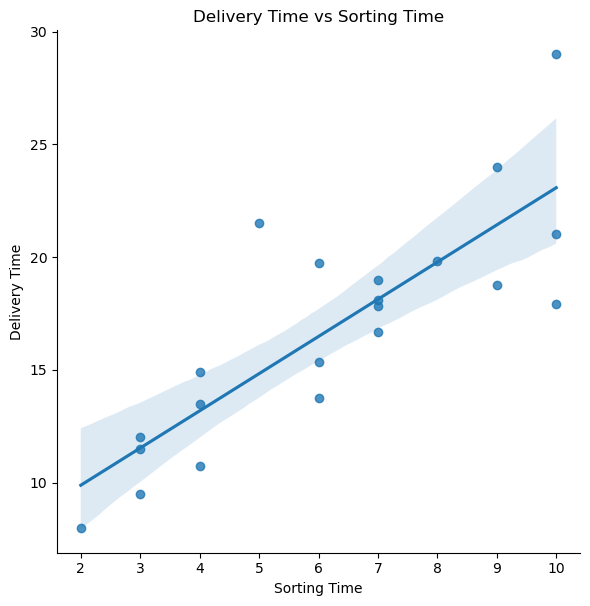

In [16]:

sns.lmplot(x='Sorting Time', y='Delivery Time', data=data, height=6)
plt.title('Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Feature Engineering (No transformation needed in this case)


#  Correlation Analysis


In [17]:
correlation = data['Sorting Time'].corr(data['Delivery Time'])
print("Correlation between Sorting Time and Delivery Time:", correlation)

Correlation between Sorting Time and Delivery Time: 0.8259972607955325


#  Model Building

In [18]:

X = data[['Sorting Time']]
y = data['Delivery Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

# Model Testing

In [21]:

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [22]:
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.9025888966971176


In [23]:
print("Mean Squared Error:", mse)

Mean Squared Error: 14.046738956635016


In [151]:
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.7478979383962705


#  Model Predictions

In [25]:

new_sorting_time = np.array([[10]])  # Example new sorting time
predicted_delivery_time = model.predict(new_sorting_time)
print("Predicted Delivery Time for Sorting Time of 10:", predicted_delivery_time[0])


Predicted Delivery Time for Sorting Time of 10: 24.924743499648628


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Create a DataFrame to store results

In [26]:
results_df = pd.DataFrame({
    'Actual Delivery Time': y_test,
    'Predicted Delivery Time': y_pred,
    'Residuals': y_test - y_pred
})

# Display the DataFrame

In [27]:
results_df

,Actual Delivery Time,Predicted Delivery Time,Residuals
0,21.00,24.924743,-3.924743
17,18.11,18.852010,-0.742010
15,14.88,12.779276,2.100724
1,13.50,12.779276,0.720724
8,17.90,24.924743,-7.024743


# Create a heatmap for the output DataFrame

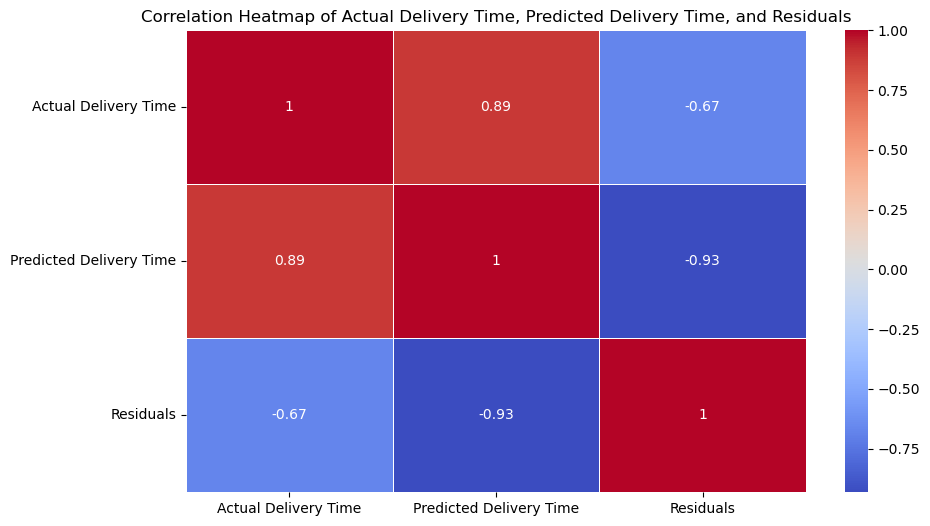

In [28]:

plt.figure(figsize=(10, 6))
sns.heatmap(results_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Actual Delivery Time, Predicted Delivery Time, and Residuals')
plt.show()

# Visualization of model results

In [29]:

plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

# Actual vs. Predicted plot

Text(0, 0.5, 'Predicted Delivery Time')

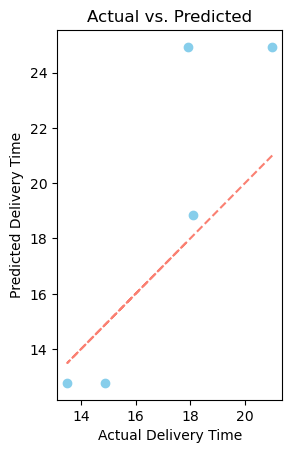

In [30]:

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot(y_test, y_test, color='salmon', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')


# Residual plot

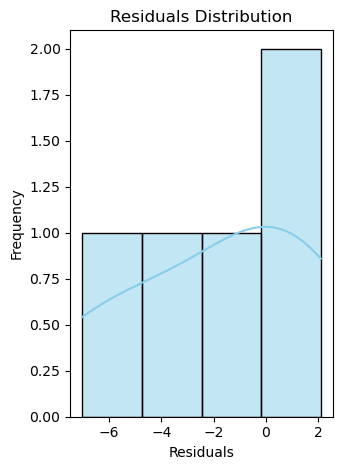

In [31]:

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
